# Hyperparameter Tuning


Hyperparameter Tuning là cách thử nhiều lần với lượng muối khác nhau để tìm công thức ngon nhất.
- Tham số là nút điều chỉnh để mô hình hoạt động tốt.
- Hyperparameter Tuning giúp tự động tìm nút điều chỉnh tối ưu.
- Grid Search: Thử tất cả -> Chính xác nhưng lâu.
- Randomized Search: Thử ngẫu nhiên -> Nhanh hơn, nhưng không chắc chắn.


Methodology:
Grid Search (tìm kiếm theo lưới) and randomized search (tìm kiếm ngẫu nhiên) for hyperparameters tuning:
- are approaches to finding hyperparameters for machine learning models.
- Grid Search:    
    - Make sure to find the best solution.    
    - Easy reproducibility of results.    
    - It takes a lot of computation time when the model has many hyperparameters.
- Randomized Search in reverse. (fits multiple hyperparameters)

### **1. Các tham số (Hyperparameters) của 1 model**

- **Tham số** là các nút điều chỉnh của mô hình để giúp nó hoạt động tốt hơn.
- **Ví dụ**:
  - **`alpha`**: Điều chỉnh độ mạnh của "hình phạt" nếu mô hình cố làm việc quá mức.
  - **`solver`**: Chọn cách giải toán để tìm câu trả lời.
  - **`fit_intercept`**: Có thêm số bắt đầu (intercept) vào công thức hay không.
  - **`tol`**: Ngưỡng dừng lại nếu thay đổi quá nhỏ.
  - **`max_iter`**: Số lần thử nghiệm tối đa trước khi dừng.

**Tưởng tượng**: chúng ta đang lái xe, "alpha" như tốc độ, "solver" là cách chọn đường đi, và "max_iter" là số lần chúng ta sẵn sàng lặp lại để tìm đường tốt nhất.

---

### **2. Hyperparameter Tuning (tối ưu tham số) là gì và tại sao cần Hyperparameter Tuning?**

- **Đơn giản**: Là cách chọn "nút điều chỉnh" (tham số) tốt nhất để mô hình hoạt động hiệu quả nhất.
- **Ví dụ dễ hiểu**:
  - chúng ta nấu mì. Nếu cho nhiều muối, mì mặn. Nếu ít muối, mì nhạt. Hyperparameter Tuning là cách thử nhiều lần với lượng muối khác nhau để tìm công thức ngon nhất.

---

### **3. Grid Search (tìm kiếm theo lưới) và Randomized Search (tìm kiếm ngẫu nhiên) trong việc lựa chọn tham số tốt nhất**

- **Grid Search**:
  - Thử **tất cả các kết hợp** tham số chúng ta đưa ra.
  - **Ví dụ**:
    - chúng ta thử từng mức muối (ít, vừa, nhiều) với từng loại gia vị (ngọt, cay). Tổng cộng chúng ta thử 6 cách nấu ăn.
  - **Ưu điểm**: Chắc chắn tìm ra cách nấu ngon nhất.
  - **Nhược điểm**: Mất nhiều thời gian nếu có quá nhiều tùy chọn.

- **Randomized Search**:
  - Thử **ngẫu nhiên một vài cách** thay vì tất cả.
  - **Ví dụ**:
    - chúng ta thử ngẫu nhiên 3 trong số 6 cách nấu.
  - **Ưu điểm**: Nhanh hơn, tiết kiệm thời gian.
  - **Nhược điểm**: Có thể bỏ lỡ cách nấu ngon nhất.

---

### **Tóm lại**
**Hyperparameter Tuning là cách thử nhiều lần với lượng muối khác nhau để tìm công thức ngon nhất.**
- **Tham số** là nút điều chỉnh để mô hình hoạt động tốt.
- **Hyperparameter Tuning** giúp tự động tìm nút điều chỉnh tối ưu.
- **Grid Search**: Thử tất cả -> Chính xác nhưng lâu.
- **Randomized Search**: Thử ngẫu nhiên -> Nhanh hơn, nhưng không chắc chắn.

## Packaging the LinearRegressionModel Class for hyperparameters tuning in Ridge and Lasso Regression

In [9]:
import pandas as pd # Import thư viện pandas để làm việc với dữ liệu dạng bảng (DataFrame)
import numpy as np # Import thư viện numpy để làm việc với mảng (arrays) và các phép toán đại số tuyến tính
from sklearn.model_selection import train_test_split # Import hàm train_test_split từ sklearn để chia dữ liệu thành tập huấn luyện và tập kiểm tra
from sklearn.linear_model import LinearRegression # Import mô hình hồi quy tuyến tính (Linear Regression) từ sklearn
from sklearn.metrics import mean_squared_error, r2_score # Import các hàm tính toán độ lỗi bình phương trung bình (mean_squared_error) và hệ số xác định R^2 (r2_score)
import matplotlib.pyplot as plt # Import thư viện matplotlib để vẽ biểu đồ

In [10]:

# 1. Đọc dữ liệu
flood_data = pd.read_csv('train.csv')

print(f"flood_data.info(): {flood_data.info()}")



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [11]:
# 1. Xác định các biến độc lập (features) và biến mục tiêu (target)
X = flood_data.drop('FloodProbability', axis=1)  # Tất cả các features
y = flood_data['FloodProbability']  # Biến mục tiêu

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Tạo và huấn luyện mô hình
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, TimeSeriesSplit
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

class LinearRegressionModel:
    def __init__(self, X_train, y_train, X_test, model, param_gird_or_dist, search_type):
        """
        Constructor for Linear Regression Model Class.

        :param X_train: (pandas DataFrame) feature training set
        :param y_train: (numpy array) target training set
        :param X_test: (pandas DataFrame) feature test set (Bổ sung biến X_test để sử dụng trong class)
        :param model: (sklearn regression model type) type of regression model to use
        :param param_distributions: (dictionary) dictionary containing hyperparameters for the model
        :param search_type: (string) type of randomized search ('grid_search' or 'random_search')
        """
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test  # Lưu lại X_test để dùng trong các phương pháp khác

        # Initialize regression model to search for best hyperparameters
        self.model = model()
        self.param_gird_or_dist = param_gird_or_dist
        self.tscv = TimeSeriesSplit(n_splits=3)

        # self.best_search_model
        if search_type == 'grid_search':
            self.gird_or_dist_search_model = GridSearchCV(estimator=self.model, param_grid=self.param_gird_or_dist, cv=self.tscv)
        elif search_type == 'random_search':
            self.gird_or_dist_search_model = RandomizedSearchCV(estimator=self.model, param_distributions=self.param_gird_or_dist, cv=self.tscv)
        else:
            raise ValueError('search_type should be either "grid_search" or "random_search"')

        self.best_linear_reg_model = None  # Bổ sung biến để lưu lại mô hình tốt nhất

    def print_best_param(self):
        """
        Find the best hyperparameters for the linear regression model using RandomizedSearchCV.
        """
        self.gird_or_dist_search_model.fit(self.X_train, self.y_train)
        print("Best parameters found: ", self.gird_or_dist_search_model.best_params_)

        # best_linear_reg_model with best_estimator của gird_or_dist_search_model
        self.best_linear_reg_model = self.gird_or_dist_search_model.best_estimator_

    def get_coef_pdSeries(self):
        # Trả về pandas Series chứa hệ số của các features
        if self.best_linear_reg_model is None:
            raise ValueError("The model has not been fitted yet. Call `print_best_param()` first.")
        coef_np = self.best_linear_reg_model.coef_      # <class 'numpy.ndarray'>
        coef_pdSeries = pd.Series(coef_np, index=self.X_train.columns)  # Tạo pandas Series obj chứa coef_ và gán nhãn bằng tên cột của X
        return coef_pdSeries  # <class 'pandas.core.series.Series'>, tương tự df, but have only 1 col, tuple (index)

    def print_important_features(self):
        # Trả về danh sách các feature quan trọng (có hệ số khác 0)
        if self.best_linear_reg_model is None:
            raise ValueError("The model has not been fitted yet. Call `print_best_param()` first.")
        coef_np = self.best_linear_reg_model.coef_
        important_features = self.X_train.columns[coef_np != 0]
        print('Important features:', important_features)

    def plot_coef_bar(self):
        """
        Plot bar graph showing the coefficients for each feature in the trained linear regression model.
        """
        if self.best_linear_reg_model is None:
            raise ValueError("The model has not been fitted yet. Call `print_best_param()` first.")
        coef_pdSeries = pd.Series(self.best_linear_reg_model.coef_, index=self.X_train.columns)

        plt.figure(figsize=(12, 6))
        coef_pdSeries.plot(kind='bar')

        plt.title('Linear Regression Coefficients')
        plt.xlabel('Features')
        plt.ylabel('Coefficient Values')
        plt.show()

    def evaluate_model(self, y_train, y_test):
        """
        parameters: `y_train`, `y_test`
        calculates evaluation metrics,
           including R-squared, MSE, RMSE, MAE, MAPE.
        """
        if self.best_linear_reg_model is None:
            raise ValueError("The model has not been fitted yet. Call `print_best_param()` first.")

        # Tự động dự đoán trên tập train và test
        y_pred_train = self.best_linear_reg_model.predict(self.X_train)
        y_pred_test = self.best_linear_reg_model.predict(self.X_test)

        print('EVALUATE METRICS ON THE TRAIN SET')
        print('Coefficient of determination R2:', r2_score(y_train, y_pred_train))  # print(model.score(X_train, y_train))
        print('Mean Squared Error MSE:', mean_squared_error(y_train, y_pred_train))
        print('Root Mean Squared Error RMSE:', np.sqrt(mean_squared_error(y_train, y_pred_train)))
        print('Mean Absolute Error MAE:', mean_absolute_error(y_train, y_pred_train))
        MAPE = mean_absolute_percentage_error(y_train, y_pred_train)
        print('Mean Absolute Percentage Error MAPE%', f"{round(MAPE*100, 2)}%", '\n')

        print('EVALUATE METRICS ON THE TEST SET')
        print('Coefficient of determination R2:', r2_score(y_test, y_pred_test))  # print(model.score(X_test, y_test))
        print('Mean Squared Error MSE:', mean_squared_error(y_test, y_pred_test))
        print('Root Mean Squared Error RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_test)))
        print('Mean Absolute Error MAE:', mean_absolute_error(y_test, y_pred_test))
        MAPE = mean_absolute_percentage_error(y_test, y_pred_test)
        print('Mean Absolute Percentage Error MAPE%', f"{round(MAPE*100, 2)}%")


Best Parameters for Ridge Regression:


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py:540:

Best parameters found:  {'tol': 0.001, 'solver': 'auto', 'random_state': 42, 'positive': False, 'max_iter': None, 'fit_intercept': True, 'copy_X': True, 'alpha': 100}

Coefficients:
id                                -2.972133e-11
MonsoonIntensity                   5.612827e-03
TopographyDrainage                 5.639340e-03
RiverManagement                    5.655062e-03
Deforestation                      5.688313e-03
Urbanization                       5.657630e-03
ClimateChange                      5.662560e-03
DamsQuality                        5.659143e-03
Siltation                          5.644334e-03
AgriculturalPractices              5.640980e-03
Encroachments                      5.652088e-03
IneffectiveDisasterPreparedness    5.643389e-03
DrainageSystems                    5.634553e-03
CoastalVulnerability               5.663676e-03
Landslides                         5.635777e-03
Watersheds                         5.645761e-03
DeterioratingInfrastructure        5.612163e-03
Po

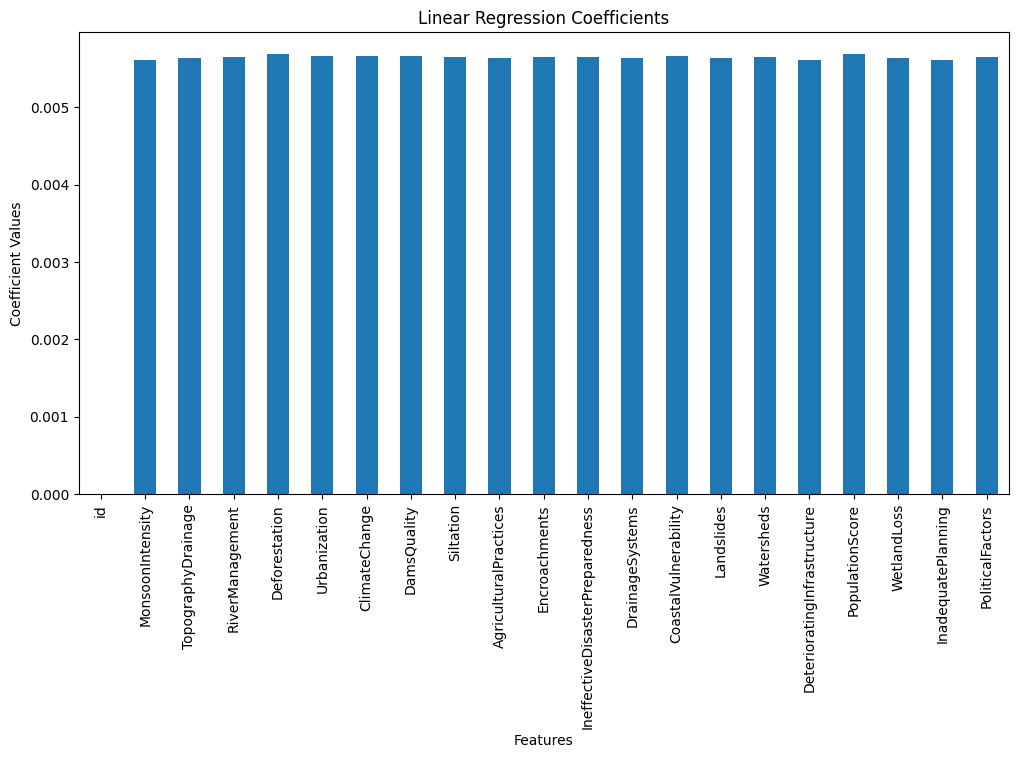


Evaluating Model:
EVALUATE METRICS ON THE TRAIN SET
Coefficient of determination R2: 0.8448974319194739
Mean Squared Error MSE: 0.00040409012928374974
Root Mean Squared Error RMSE: 0.020101993166941175
Mean Absolute Error MAE: 0.01582127813960289
Mean Absolute Percentage Error MAPE% 3.19% 

EVALUATE METRICS ON THE TEST SET
Coefficient of determination R2: 0.8450696030886053
Mean Squared Error MSE: 0.00040278964955467927
Root Mean Squared Error RMSE: 0.02006962006503061
Mean Absolute Error MAE: 0.015787927418085844
Mean Absolute Percentage Error MAPE% 3.19%


In [16]:
from sklearn.linear_model import Ridge

# Ridge: hyperparameter Tuning (trong lúc đóng gói đã test thử với 'alpha', 'solver', 'random_state' with gird_search)
param_Ridge = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100], # L2 regularization strength
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'], # pp giải quyết optimal values
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag'],  # sparse_cg, saga not support
    'fit_intercept': [True, False], # model có dùng hệ số chặn không.
    'copy_X': [True, False],
    'max_iter': [None, 1000, 5000],
    'tol': [0.001, 0.0001, 0.00001], # độ biến thiên tối thiểu cho phép tiếp tục huấn luyện.
    'positive': [True, False],
    'random_state': [42] # or any other integer value
}
# Thêm `X_test` vào khi khởi tạo class
best_ridge_model = LinearRegressionModel(X_train, y_train, X_test, Ridge, param_gird_or_dist=param_Ridge, search_type='random_search')

print("Best Parameters for Ridge Regression:") # In ra tham số tốt nhất
best_ridge_model.print_best_param()


print("\nCoefficients:") # Trực quan hóa hệ số
print(best_ridge_model.get_coef_pdSeries())

print("\nImportant Features:") # Trả về các feature quan trọng
best_ridge_model.print_important_features()

print("\nPlotting Coefficients:") # Trực quan hóa hệ số dưới dạng biểu đồ
best_ridge_model.plot_coef_bar()

print("\nEvaluating Model:")  # Đánh giá mô hình
best_ridge_model.evaluate_model(y_train, y_test)

**Thu được**:
Best parameters found:  {'tol': 1e-05, 'solver': 'auto', 'random_state': 42, 'positive': True, 'max_iter': None, 'fit_intercept': True, 'copy_X': False, 'alpha': 0.001}